<a href="https://colab.research.google.com/github/nitinlodhi019/Deep-Learning/blob/main/vanishing-gradient-problem/vanishing_gradient_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Vanishing Gradient Problem

The vanishing gradient problem is a challenge that occurs during the training of artificial neural networks when the gradients become very small and diminish as they are propagated back through the network. This can lead to minimal or no updates to the weights in the initial layers, which can slow down the training process or stop the neural network from learning further.

* no change in loss
* weights values would be same after multiple iteration


In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

In [41]:
X, y = make_moons(n_samples=400, noise=0.05, random_state=42)
print(X.shape)
print(y.shape)

(400, 2)
(400,)


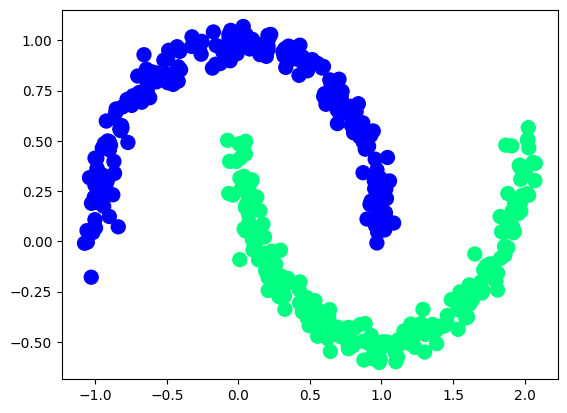

In [42]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)
plt.show()

In [43]:
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_dim=2))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,141 (4.46 KB)

 Trainable params: 1,141 (4.46 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
old_weights = model.get_weights()[0] #extract weigth of first layer

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(320, 2)
(320,)
(80, 2)
(80,)


In [48]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4707 - loss: 0.8391
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5130 - loss: 0.7720 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4868 - loss: 0.7730 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4863 - loss: 0.7537 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5027 - loss: 0.7286 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4964 - loss: 0.7207 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5440 - loss: 0.6936 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5117 - loss: 0.7018  
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5017 - loss: 0.7008 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4955 - loss: 0.6994 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5296 - loss: 0.6914 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

In [49]:
new_weights = model.get_weights()[0]  #store new weights

In [50]:
model.optimizer.get_config()['learning_rate']  #learning rate

0.0010000000474974513

In [51]:
gradient = (old_weights - new_weights)/0.0010000000474974513   #Calculate gradient
percent_change = abs(100*(old_weights - new_weights)/old_weights)  # percentage change

In [52]:
gradient

array([[-2.41631269e+00, -7.09016266e+01,  3.40265012e+00,
        -9.60108109e+01,  6.15871544e+01,  4.74850807e+01,
         4.48060036e+00,  1.01364845e+02,  3.56536179e+01,
        -8.51569443e+01],
       [ 2.26300955e+00,  6.44273758e+01,  3.97562943e-02,
         7.72262955e+01, -4.70676994e+01, -3.58160210e+01,
        -4.25276136e+00, -8.05511169e+01, -2.77877140e+01,
         7.03530426e+01]], dtype=float32)

In [53]:
percent_change

array([[6.7917138e-01, 1.2166132e+01, 2.0676415e+00, 4.8647499e+01,
        6.1437294e+01, 4.6251541e+01, 6.9033247e-01, 7.4200768e+01,
        1.0290751e+01, 3.0719992e+01],
       [4.3249923e-01, 1.0134381e+01, 1.0065231e-02, 7.2466576e+01,
        2.4061375e+01, 4.3807476e+01, 1.4231218e+00, 2.6512980e+01,
        7.5011358e+00, 4.8362415e+01]], dtype=float32)

In [54]:
old_weights

array([[ 0.35577363,  0.58277875,  0.16456676, -0.19736022,  0.10024393,
        -0.10266703, -0.64904964, -0.1366089 , -0.34646276,  0.27720368],
       [-0.52324015, -0.63573074,  0.39498645, -0.10656816,  0.19561517,
        -0.08175778, -0.29883328,  0.3038177 ,  0.37044674, -0.1454705 ]],
      dtype=float32)

In [55]:
new_weights

array([[ 0.35818994,  0.6536804 ,  0.1611641 , -0.10134941,  0.03865677,
        -0.15015212, -0.65353024, -0.23797375, -0.38211638,  0.36236063],
       [-0.52550316, -0.7001581 ,  0.3949467 , -0.18379445,  0.24268287,
        -0.04594176, -0.29458052,  0.3843688 ,  0.39823446, -0.21582355]],
      dtype=float32)

#Solution

##1.Reduce Model Complexity

In [56]:
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_dim=2))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))


In [57]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
model.get_weights()[0]

array([[-0.6423171 , -0.12031609,  0.08700746,  0.44683868, -0.03063399,
         0.50784487,  0.14783597, -0.61123586, -0.15335047,  0.31146652],
       [-0.5094512 ,  0.2613892 ,  0.49902254,  0.04936862,  0.334724  ,
        -0.6052761 ,  0.57232517, -0.02422178,  0.24051923,  0.67411906]],
      dtype=float32)

In [60]:
old_weights = model.get_weights()[0]

In [62]:
model.fit(X_train, y_train, epochs=100)   # we can the changes in loss

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8632 - loss: 0.3055 
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8535 - loss: 0.3092 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8759 - loss: 0.2846 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8712 - loss: 0.3027 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8760 - loss: 0.2888 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8663 - loss: 0.2876  
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8728 - loss: 0.2908 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8890 - loss: 0.2739  
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8851 - loss: 0.2778  
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8598 - loss: 0.3125 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8689 - loss: 0.2919 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

In [71]:
new_weights = model.get_weights()[0]  # we can the changes

In [64]:
new_weights

array([[-0.01102429,  0.31226823,  0.37453637,  0.56817013, -0.385408  ,
         0.5203903 ,  0.3405208 , -0.4707255 ,  0.30204657,  0.5982928 ],
       [-2.2940774 , -1.4699776 , -0.79999   , -1.6577046 ,  1.9799818 ,
        -2.2097683 , -0.81153816,  1.2997504 , -1.3764945 ,  1.7110703 ]],
      dtype=float32)

In [65]:
old_weights

array([[-0.6423171 , -0.12031609,  0.08700746,  0.44683868, -0.03063399,
         0.50784487,  0.14783597, -0.61123586, -0.15335047,  0.31146652],
       [-0.5094512 ,  0.2613892 ,  0.49902254,  0.04936862,  0.334724  ,
        -0.6052761 ,  0.57232517, -0.02422178,  0.24051923,  0.67411906]],
      dtype=float32)

In [66]:
model.optimizer.get_config()['learning_rate']  #learning rate

0.0010000000474974513

In [68]:
gradient = (old_weights - new_weights)/0.0010000000474974513   #Calculate gradient
percent_change = abs(100*(old_weights - new_weights)/old_weights)  # percentage change

In [69]:
gradient

array([[ -631.2928  ,  -432.5843  ,  -287.5289  ,  -121.33144 ,
          354.77402 ,   -12.545406,  -192.68481 ,  -140.51035 ,
         -455.397   ,  -286.8263  ],
       [ 1784.6262  ,  1731.3668  ,  1299.0125  ,  1707.0731  ,
        -1645.2577  ,  1604.4921  ,  1383.8633  , -1323.9722  ,
         1617.0137  , -1036.9513  ]], dtype=float32)

In [70]:
percent_change

array([[9.8283669e+01, 3.5953986e+02, 3.3046463e+02, 2.7153301e+01,
        1.1581060e+03, 2.4703226e+00, 1.3033690e+02, 2.2987909e+01,
        2.9696487e+02, 9.2088966e+01],
       [3.5030368e+02, 6.6237128e+02, 2.6031140e+02, 3.4578103e+03,
        4.9152664e+02, 2.6508435e+02, 2.4179671e+02, 5.4660405e+03,
        6.7230121e+02, 1.5382317e+02]], dtype=float32)

##2.Use different activation function(ReLU)

In [76]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=2))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [78]:
old_weights = model.get_weights()[0]

In [79]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6308 - loss: 0.6921
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6682 - loss: 0.6864 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7075 - loss: 0.6760 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7314 - loss: 0.6595 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7641 - loss: 0.6285 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8029 - loss: 0.5662 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8615 - loss: 0.5176 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8640 - loss: 0.4555 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9070 - loss: 0.4146 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8918 - loss: 0.4270 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8648 - loss: 0.4611
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - 

In [80]:
new_weights = model.get_weights()[0]

In [81]:
model.optimizer.get_config()['learning_rate']  #learning rate

0.0010000000474974513

In [82]:
gradient = (old_weights - new_weights)/0.0010000000474974513   #Calculate gradient
percent_change = abs(100*(old_weights - new_weights)/old_weights)  # percentage change

In [83]:
gradient

array([[ 216.29419 , -126.08839 ,  -78.15349 ,  216.20865 ,   37.870525,
         -23.680359,   32.78422 ,   49.52091 ,  193.79454 ,   87.09442 ],
       [-155.15717 ,  -36.984085,   38.40178 ,  -89.16044 ,  -81.607635,
         -87.56524 ,  -89.81222 ,  -44.328808, -105.314735,  -63.14203 ]],
      dtype=float32)

In [84]:
percent_change

array([[ 60.30573  , 147.95007  ,  13.018609 , 132.35963  ,   6.290828 ,
         27.183859 ,   5.624493 ,   7.5262294, 108.91928  ,  30.927887 ],
       [ 27.485163 ,   5.8474927,   7.07149  ,  22.688177 ,  15.087206 ,
         20.675352 ,  12.936375 ,   6.5084157,  47.273056 , 113.12521  ]],
      dtype=float32)

In [85]:
old_weights

array([[-0.35866275,  0.08522362,  0.60032135, -0.16334939,  0.6019959 ,
        -0.08711183,  0.5828832 , -0.6579777 , -0.17792493, -0.28160483],
       [-0.5645125 , -0.6324777 ,  0.5430508 ,  0.39298195, -0.54090625,
         0.4235248 ,  0.69426113,  0.68109983, -0.22277963, -0.05581605]],
      dtype=float32)

In [86]:
new_weights

array([[-0.57495695,  0.21131201,  0.67847484, -0.37955806,  0.56412536,
        -0.06343147,  0.55009896, -0.7074986 , -0.37171948, -0.36869925],
       [-0.4093553 , -0.5954936 ,  0.50464904,  0.4821424 , -0.4592986 ,
         0.51109004,  0.78407335,  0.72542864, -0.11746489,  0.00732598]],
      dtype=float32)

##3.Proper weights initialization

##4.Batch Normalozation

##5.Residual Networks